# Módulo  - Estatística II

## Projeto - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 05/05;
- O projeto poderá ser feito __individualmente__ ou em __grupos__ de até __4 pessoas__;

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram análises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, o projeto será dividido em dois modelos, um de Regressão Linear e outra de Regressão Logística. No __primeiro módulo__, o objetivo será modelar um regressor que estime o valor da qualidade do vinho (para este primeiro modelo, desconsidere a variável `quality`). No __segundo modelo__, utilizando como variável resposta (_target_) a variável `quality`, modelar um classificador que separe entre vinhos bons e ruins (para isto, considere `quality` >= 6 como um vinho bom). Além disso, avaliar a necessidade ou não de aplicar regularizações no modelo.

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

<br>

__Importante:__ Façam as análise em ambas as bases `winequality-red.csv` e `winequality-white.csv` separadamente, e depois misturem os dados para uma nova análise (no total serão 3 análises a serem feitas).

<br>

A entrega deve ser feita em um arquivo _Jupyter Notebook_ em aba que será disponibilizada no Class, contendo todo o desenvolvimento do projeto e o nome(s) do(s) aluno(s).

Olhando para os dados:

In [2]:
# importe as principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, r2_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

# import warnings filter
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Abrindo os datasets para análise
red = pd.read_csv("../datasets/winequality-red.csv", sep=";")
white = pd.read_csv("../datasets/winequality-white.csv", sep=";")

# Vinho Tinto


In [ ]:
# Conhecendo o dataset
red.head()

In [ ]:
# Analisando as informações do dataset
red.info()

In [4]:
# Retirando dados duplicados do dataset
Red = red.drop_duplicates()

In [ ]:
#Verificando as métricas do dataset
Red.describe()

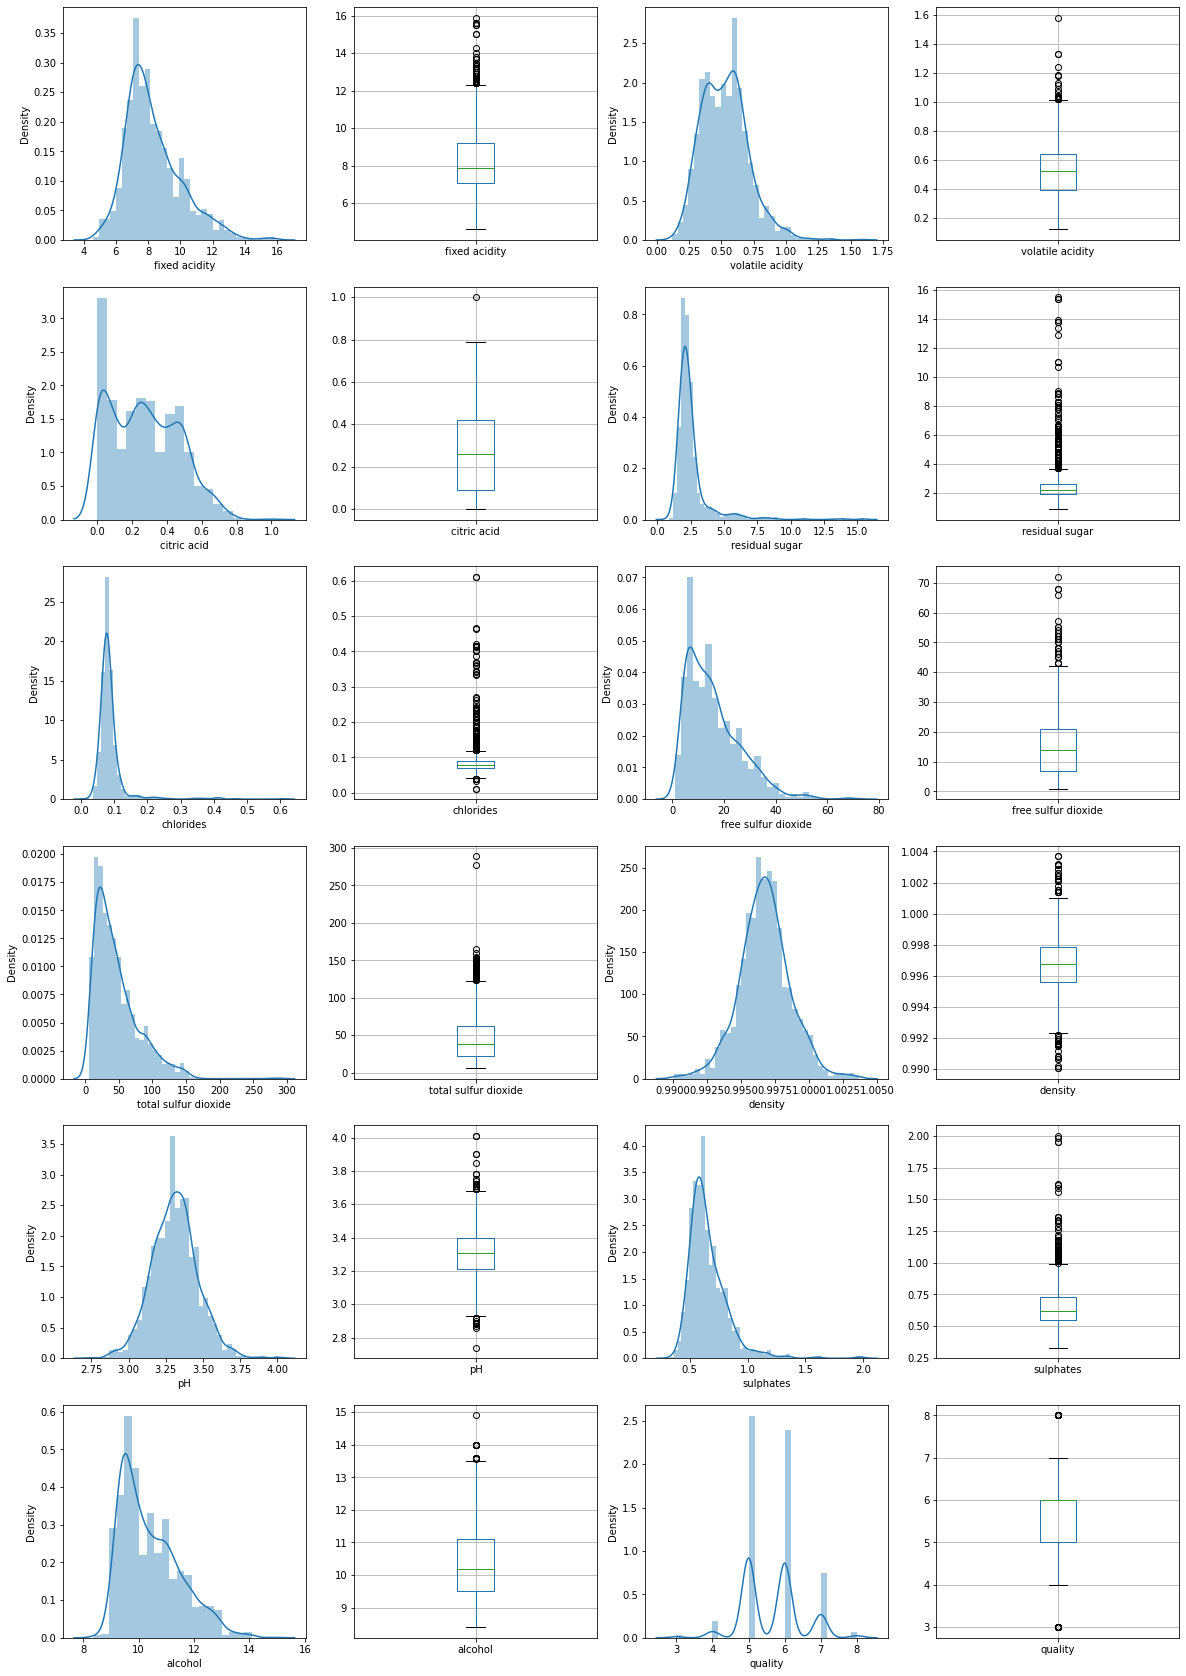

In [15]:
fig, ax = plt.subplots(6, 4, figsize=(20, 30))
ax = ax.flatten()
columns = red.columns
for i, col in enumerate(columns):
    sns.distplot(red[col], ax=ax[i+i])
    red.boxplot(col, ax=ax[i+1+i])
    #print()
plt.show()

In [ ]:
# Define o tamanho da figura
figure = plt.figure(figsize=(20, 30))
columns = red.columns

for i in enumerate(columns):
    plt.subplot(6, 4,i[0]+1)
    red.boxplot([i[1]])
    


In [ ]:
# Define o tamanho da figura
figure = plt.figure(figsize=(20, 30))
columns = red.columns

for i in range(len(columns)):
    figure.add_subplot(6, 4, i+1)
    sns.distplot(red[columns[i]])
    
    
plt.show()

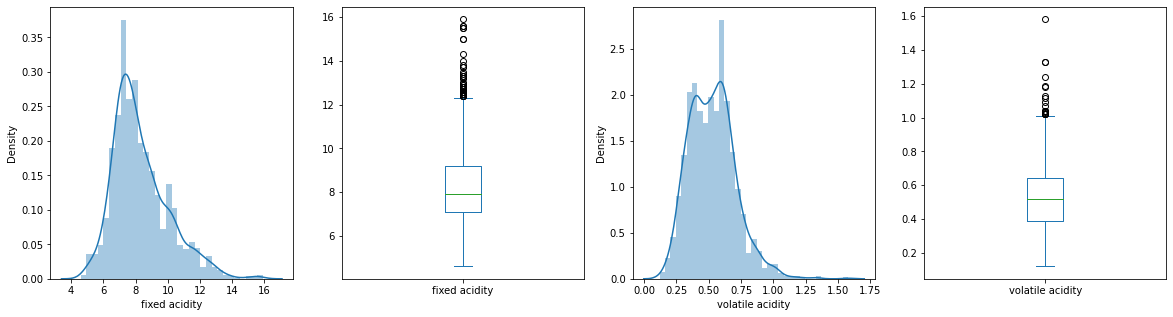

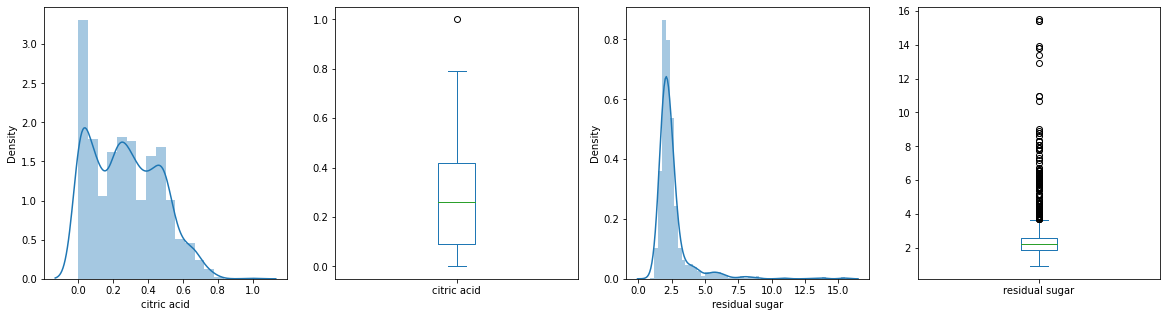

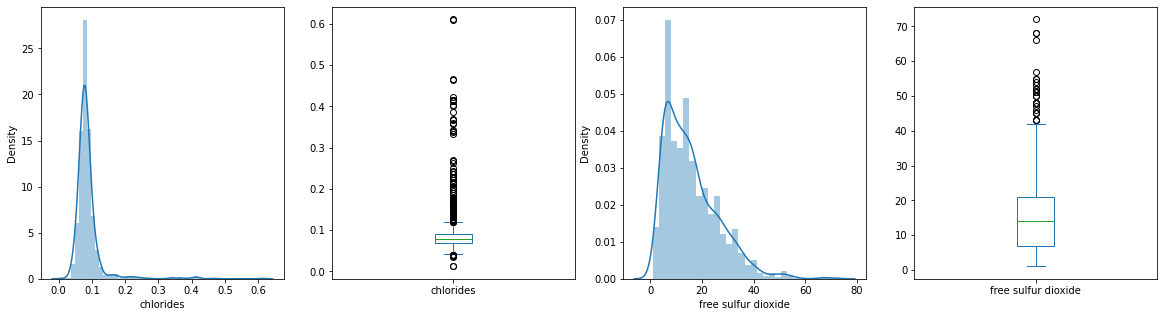

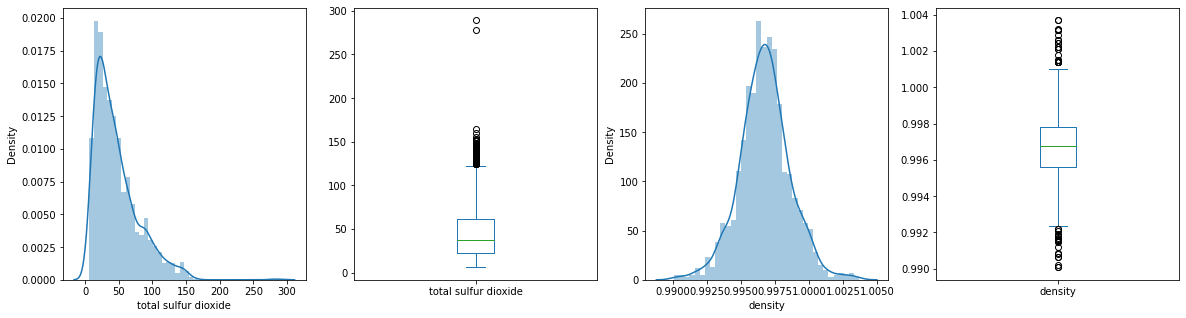

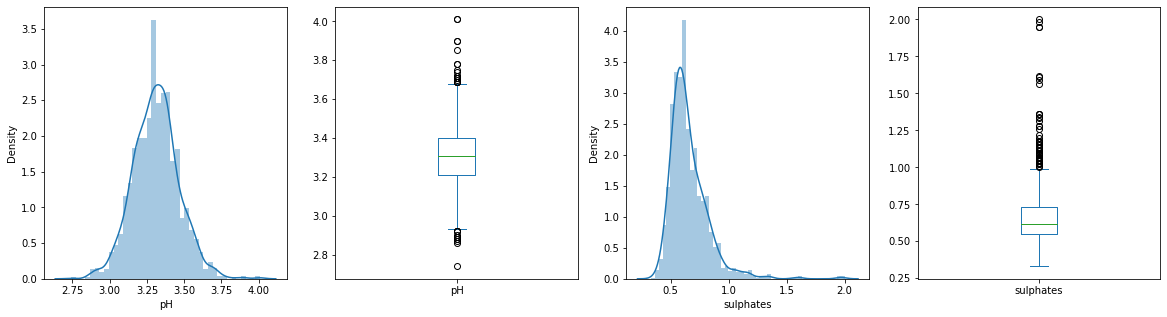

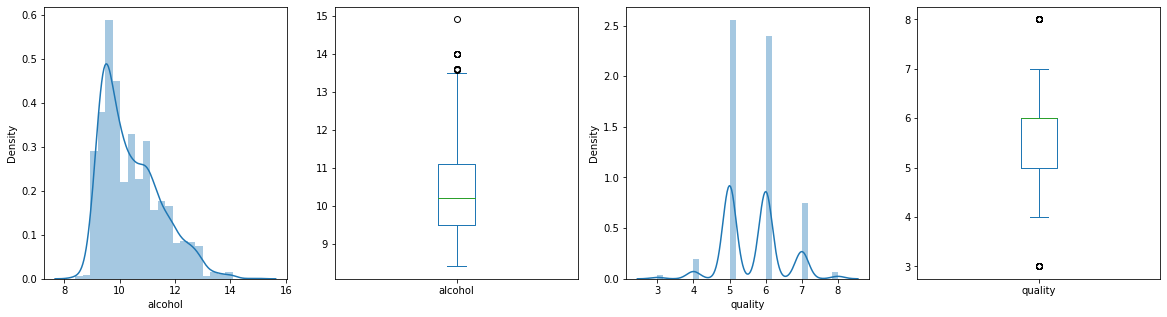

In [16]:
#visualizando os outliers de cada coluna

plt.subplot(141)
sns.distplot(red['fixed acidity'])
plt.subplot(142)
red['fixed acidity'].plot.box(figsize=(20,5))

plt.subplot(143)
sns.distplot(red['volatile acidity'])
plt.subplot(144)
red['volatile acidity'].plot.box(figsize=(20,5))
plt.show()

plt.subplot(141)
sns.distplot(red['citric acid'])
plt.subplot(142)
red['citric acid'].plot.box(figsize=(20,5))

plt.subplot(143)
sns.distplot(red['residual sugar'])
plt.subplot(144)
red['residual sugar'].plot.box(figsize=(20,5))
plt.show()

plt.subplot(141)
sns.distplot(red['chlorides'])
plt.subplot(142)
red['chlorides'].plot.box(figsize=(20,5))

plt.subplot(143)
sns.distplot(red['free sulfur dioxide'])
plt.subplot(144)
red['free sulfur dioxide'].plot.box(figsize=(20,5))
plt.show()

plt.subplot(141)
sns.distplot(red['total sulfur dioxide'])
plt.subplot(142)
red['total sulfur dioxide'].plot.box(figsize=(20,5))

plt.subplot(143)
sns.distplot(red['density'])
plt.subplot(144)
red['density'].plot.box(figsize=(20,5))
plt.show()

plt.subplot(141)
sns.distplot(red['pH'])
plt.subplot(142)
red['pH'].plot.box(figsize=(20,5))

plt.subplot(143)
sns.distplot(red['sulphates'])
plt.subplot(144)
red['sulphates'].plot.box(figsize=(20,5))
plt.show()

plt.subplot(141)
sns.distplot(red['alcohol'])
plt.subplot(142)
red['alcohol'].plot.box(figsize=(20,5))

plt.subplot(143)
sns.distplot(red['quality'])
plt.subplot(144)
red['quality'].plot.box(figsize=(20,5))
plt.show()

In [ ]:
# visualizando graficamente a coluna 'quality'
sns.countplot(x='quality', data = Red)

In [ ]:
#visualiza graficamente a correlação das colunas
sns.pairplot(Red)
plt.show()

In [ ]:
#Visualizando a correlação entre as colunas, extrai-se do heatmap que q qualidade tem correlação grande com o teor alcólico
# do vinho.
plt.figure(figsize = (10,10))
sns.heatmap(Red.corr(), annot = True)
plt.show()

## Regressão Linear da base de vinho tinto

In [ ]:
#Preparando os dados para modelagem regressão linear
X = Red.drop(['quality'], axis = 1)
y = Red['quality']

In [ ]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [ ]:
#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
#Iniciando 
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
y_pred

In [ ]:
# Comparando valores reais com os preditos
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [ ]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)

print(f'R2 = {R2}')

## Regressão Logística da base de vinho tinto

In [ ]:
#Preparando os dados para regressão logística

In [ ]:
red = pd.read_csv('winequality-red.csv', sep=';')
Red = red.drop_duplicates()

Red.loc[Red.quality<6, 'qualidade'] = 0
Red.loc[Red.quality >= 6, 'qualidade'] = 1
Red_linear = Red.drop(['quality'], axis = 1)

In [ ]:
Red_linear['qualidade'].value_counts()

In [ ]:
Red_linear['qualidade'].value_counts(normalize=True)

In [ ]:
X = Red_linear.select_dtypes(include = [np.number]).drop(columns = "qualidade")
y = Red_linear['qualidade']

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [ ]:
#normalizando as variáveis
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
#Iniciando treino
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

In [ ]:
# Comparando os dados reais dos preditos
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [ ]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)

print(f'R2 = {R2}')

# Vinho Branco

In [ ]:
#Realizando análise do Vinho branco

In [ ]:
white.head()

In [ ]:
white.info()

In [ ]:
# Verifica-se que o dataset não contém dados nulos

In [ ]:
# Retirando dados duplicados do dataset
White = white.drop_duplicates()
White

In [ ]:
#Verificando as métricas do dataset
White.describe()

In [ ]:
sns.distplot(White['quality'], kde = True)
sns.distplot(Red['quality'], kde = True)
plt.show()

In [ ]:
#visualizando os outliers de cada coluna
White.plot(kind = 'box', figsize = (20,12), subplots = True)

In [ ]:
# visualizando graficamente a coluna 'quality'
sns.countplot(x='quality', data = White)

In [ ]:
#visualiza graficamente a correlação das colunas, percebe-se que os valores não são lineares
sns.pairplot(White)
plt.show()


In [ ]:
#Visualizando a correlação entre as colunas, extrai-se do heatmap que a qualidade tem correlação grande com o teor alcólico
# do vinho.
plt.figure(figsize = (10,10))
sns.heatmap(White.corr(), annot = True)
plt.show()

## Regressão Linear da base de vinho branco

In [ ]:
#Preparando os dados para modelagem
X = White.drop(['quality'], axis = 1)
y = White['quality']

# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
#Iniciando 
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

# Comparando o target original com o predito
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [ ]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)

print(f'R2 = {R2}')

## Regressão Logística da base de vinho branco

In [ ]:
#Preparando os dados para regressão logística
white = pd.read_csv('winequality-white.csv', sep=';')
White = white.drop_duplicates()

In [ ]:
# Classificando o vinho como bom (qualidade 0) ou ruim (qualidade 1), através da coluna quality
White.loc[White.quality<6, 'qualidade'] = 0
White.loc[White.quality>=6, 'qualidade'] = 1

In [ ]:
#Retirando a coluna quality para não influenciar o modelo
White_logistica = White.drop(columns = 'quality')

In [ ]:
#Analisando a amostra pela quantificação da qualidade
White_logistica['qualidade'].value_counts()
White_logistica['qualidade'].value_counts(normalize=True)



In [ ]:
#preparando a base para regressão
X = White_logistica.select_dtypes(include = [np.number]).drop(columns = "qualidade")
y = White_logistica['qualidade']

#Separando a base em treino e teste
White_logistica['qualidade'].value_counts(normalize=True)

#normalizando as variáveis
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
#Iniciando treino
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

# Comparando os dados reais dos preditos
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [ ]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)

print(f'R2 = {R2}')

# Vinho branco e tinto

In [ ]:
#Juntando as bases dos vinhos branco e tinto para análise

In [ ]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')
wines= pd.concat([red, white], ignore_index = True)
wines

In [ ]:
Wines = wines.drop_duplicates()
Wines

In [ ]:
# Analisando as informações do dataset
Wines.info() 

In [ ]:
# Verifica-se que o dataset não contém dados nulos

In [ ]:
#Verificando as métricas do dataset
Wines.describe()


In [ ]:
# Verificando os outliers de cada coluna
Wines.plot(kind = 'box', figsize = (20,12), subplots = True)

In [ ]:
#visualizando graficamente a correlação das colunas, percebe-se que os valores não são lineares
sns.pairplot(Wines)
plt.show()


In [ ]:
#Visualizando a correlação entre as colunas, extrai-se do heatmap que q qualidade tem correlação grande com o teor alcólico
# do vinho.
plt.figure(figsize = (10,10))
sns.heatmap(Wines.corr(), annot = True)
plt.show()


# Regressão Linear

In [ ]:
#Preparando os dados para modelagem
X = Wines.drop(['quality'], axis = 1)
y = Wines['quality']

In [ ]:
#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
#Iniciando 
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

# Comparando valores reais com os preditos
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()


In [ ]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)


print(f'R2 = {R2}')


# Regressão Logística

In [ ]:
# Preparando a base para regressão logística
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')
wines= pd.concat([red, white], ignore_index = True)
Wines = wines.drop_duplicates()

Wines.loc[Wines.quality<6, 'qualidade'] = 0
Wines.loc[Wines.quality>=6, 'qualidade'] = 1
Wines_logistico = Wines.drop(['quality'], axis = 1)



In [ ]:
#Analisando as proporções da amostra pela qualidade
Wines_logistico['qualidade'].value_counts(normalize=True)


In [ ]:
#preparando a base para regressão
X = Wines_logistico.select_dtypes(include = [np.number]).drop(columns = "qualidade")
y = Wines_logistico['qualidade']


In [ ]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

#Normalização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
#Iniciando 
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

# Comparando o target original com o predito
fig = plt.figure(figsize=(5,5))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [ ]:
# Cálculo do R2 score
R2 = r2_score(y_test, y_pred)

print(f'R2 = {R2}')